<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-the-dataset" data-toc-modified-id="Preparing-the-dataset-1">Preparing the dataset</a></span></li><li><span><a href="#a.-Fitting-the-model" data-toc-modified-id="a.-Fitting-the-model-2">a. Fitting the model</a></span><ul class="toc-item"><li><span><a href="#i.-Is-there-a-relationship-between-horsepower-and-mpg?" data-toc-modified-id="i.-Is-there-a-relationship-between-horsepower-and-mpg?-2.1">i. Is there a relationship between <code>horsepower</code> and <code>mpg</code>?</a></span></li><li><span><a href="#ii.-How-strong-is-the-relationship?" data-toc-modified-id="ii.-How-strong-is-the-relationship?-2.2">ii. How strong is the relationship?</a></span></li><li><span><a href="#iii.-Is-the-relationship-positive-or-negative?" data-toc-modified-id="iii.-Is-the-relationship-positive-or-negative?-2.3">iii. Is the relationship positive or negative?</a></span></li><li><span><a href="#iv.-What-is-the-predicted-mpg-associated-with-a-horsepower-of-98?-What-are-the-associated-95%-confidence-and-prediction-intervals?" data-toc-modified-id="iv.-What-is-the-predicted-mpg-associated-with-a-horsepower-of-98?-What-are-the-associated-95%-confidence-and-prediction-intervals?-2.4">iv. What is the predicted <code>mpg</code> associated with a <code>horsepower</code> of 98? What are the associated 95% confidence and prediction intervals?</a></span></li></ul></li><li><span><a href="#b.-Scatterplot-and-least-squares-line-plot" data-toc-modified-id="b.-Scatterplot-and-least-squares-line-plot-3">b. Scatterplot and least squares line plot</a></span></li><li><span><a href="#c.-Diagnostic-plots" data-toc-modified-id="c.-Diagnostic-plots-4">c. Diagnostic plots</a></span><ul class="toc-item"><li><span><a href="#Studentized-Residuals-vs.-Fitted-plot" data-toc-modified-id="Studentized-Residuals-vs.-Fitted-plot-4.1">Studentized Residuals vs. Fitted plot</a></span></li><li><span><a href="#QQ-plot-of-Residuals" data-toc-modified-id="QQ-plot-of-Residuals-4.2">QQ-plot of Residuals</a></span></li><li><span><a href="#Scale-location-plot" data-toc-modified-id="Scale-location-plot-4.3">Scale-location plot</a></span></li><li><span><a href="#Influence-Plot" data-toc-modified-id="Influence-Plot-4.4">Influence Plot</a></span></li></ul></li><li><span><a href="#Footnotes" data-toc-modified-id="Footnotes-5">Footnotes</a></span></li></ul></div>

# Simple regression of `mpg` on `horsepower` in `auto` dataset

## Preparing the dataset

Import pandas, load the `Auto` dataset, and inspect

In [1]:
import pandas as pd

auto = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


All the dtypes look good except `horsepower`.

In [3]:
auto.horsepower = pd.to_numeric(auto.horsepower, errors='coerce')
auto.horsepower.dtype

dtype('float64')

##  a. Fitting the model

There are lots of way to [do simple linear regression with Python](https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b). For statistical analysis, `statsmodel` is useful.

In [4]:
import statsmodels.api as sm

In [5]:
# filter out null entries
X = auto.horsepower[auto.mpg.notna() & auto.horsepower.notna()]
Y = auto.mpg[auto.mpg.notna() & auto.horsepower.notna()]
X

# add constant
X = sm.add_constant(X)

# create and fit model
model = sm.OLS(Y, X)
model = model.fit()

# show results summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 27 Oct 2018   Prob (F-statistic):           7.03e-81
Time:                        08:23:54   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now to answer the questions

### i. Is there a relationship between `horsepower` and `mpg`?

This question is answered by testing the hypothesis

$$H_0: \beta_1 = 0$$
$$H_a: \beta_1 \neq 0$$

In the results summary table above, the value `P>|t|` in the row `horsepower` is the p-value for our hypothesis test. Since it's $< 0.5e-3$, we reject $H_0$ and conclude there is a relationship between `mpg` and `hp`

### ii. How strong is the relationship?

This question is answered by checking the $R^2$ value.

In [6]:
model.rsquared

0.6059482578894348

It's hard to interpret this based on the current state of my knowledge about the data. Interpretation is discussed on page 70 of the book, but it's not clear where this problem fits into that discussion. 

Given $\min(R^2) = 0$ indicates no relationship and $\max(R^2) = 1$ indicates a perfect (linear) relationship, I'll say this is a somewhat strong relationship.

### iii. Is the relationship positive or negative?

This is given by the sign of $\beta_1$

In [7]:
model.params

const         39.935861
horsepower    -0.157845
dtype: float64

Since $\beta_1 = -0.157845$, the relationship is negative

### iv. What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95% confidence and prediction intervals?


In [8]:
prediction = model.get_prediction([1, 98])
pred_df = prediction.summary_frame()
pred_df.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


The predicted value for `mpg`=98 is

In [9]:
pred_df['mean']

0    24.467077
Name: mean, dtype: float64

The confidence interval is

In [10]:
(pred_df['mean_ci_lower'].values[0], pred_df['mean_ci_upper'].values[0])

(23.97307896070394, 24.961075344320907)

While the prediction interval is

In [11]:
(pred_df['obs_ci_lower'].values[0], pred_df['obs_ci_upper'].values[0])

(14.809396070967116, 34.12475823405773)

## b. Scatterplot and least squares line plot

In [12]:
# setup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.style.use('seaborn-white')
sns.set_style('white')

For convenience, assemble the results in a new dataframe

In [13]:
# get full prediction results
pred_df = model.get_prediction().summary_frame()

# rename columns to avoid `mean` name conflicts and other confusions
new_names = {}
for name in pred_df.columns:
    if 'mean' in name:
        new_names[name] = name.replace('mean', 'mpg_pred')
    elif 'obs_ci' in name:
        new_names[name] = name.replace('obs_ci', 'mpg_pred_pi')
    else:
        new_names[name] = name
pred_df = pred_df.rename(new_names, axis='columns')

# concat mpg, horsepower and prediction results in dataframe
model_df = pd.concat([X, Y, pred_df], axis=1)
model_df.head()

,const,horsepower,mpg,mpg_pred,mpg_pred_se,mpg_pred_ci_lower,mpg_pred_ci_upper,mpg_pred_pi_lower,mpg_pred_pi_upper
0,1.0,130.0,18.0,19.416046,0.297444,18.831250,20.000841,9.753295,29.078797
1,1.0,165.0,15.0,13.891480,0.462181,12.982802,14.800158,4.203732,23.579228
2,1.0,150.0,18.0,16.259151,0.384080,15.504025,17.014277,6.584598,25.933704
3,1.0,150.0,16.0,16.259151,0.384080,15.504025,17.014277,6.584598,25.933704
4,1.0,140.0,17.0,17.837598,0.337403,17.174242,18.500955,8.169775,27.505422


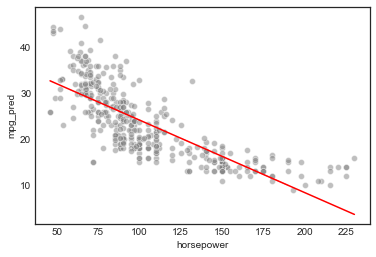

In [14]:
# plot
sns.scatterplot(model_df.horsepower, model_df.mpg, facecolors='grey', alpha=0.5)
sns.lineplot(model_df.horsepower, model_df.mpg_pred, color='r')

## c. Diagnostic plots 

This exercise uses R's [`plot()` function](https://www.rdocumentation.org/packages/graphics/versions/3.5.1/topics/plot), which by default returns [four diagnostic plots](https://data.library.virginia.edu/diagnostic-plots/). We'll recreate those plots in python <sup><a href='#foot0' id='ref0'>0</a></sup>.

### Studentized Residuals vs. Fitted plot

This helps identify non-linearity

Text(0,0.5,'studentized resid')

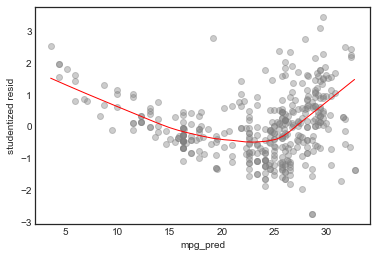

In [15]:
# add studentized residuals to the dataframe
model_df['resid'] = model.resid

# studentized residuals vs. predicted values plot
sns.regplot(model_df.mpg_pred, model_df.resid/model_df.resid.std(), lowess=True, 
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'grey', 'edgecolors':'grey', 'alpha':0.4})
plt.ylabel('studentized resid')

This is a pretty clear indication of non-inearity (see p93) of text). We can also see some outliers

### QQ-plot of Residuals

This tests the assumption that the errors are normally distributed

Text(0.5,0,'standard normal quantiles')

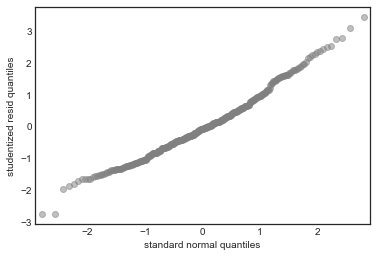

In [16]:
# plot standardized residuals against a standard normal distribution
sm.qqplot(model_df.resid/model_df.resid.std(), color='grey', alpha=0.5, xlabel='')
plt.ylabel('studentized resid quantiles')
plt.xlabel('standard normal quantiles')

In this case there's good agreement with the normality assumption

### Scale-location plot

This tests the assumption of homoscedasticity (equal variance) of the errors

Text(0,0.5,'√|studentized resid|')

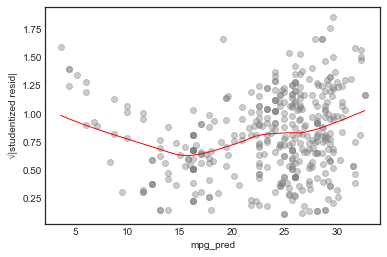

In [17]:
sns.regplot(model_df.mpg_pred, np.sqrt(np.abs(model_df.resid/model_df.resid.std())), lowess=True, 
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'grey', 'edgecolors':'grey', 'alpha':0.4})
plt.ylabel('√|studentized resid|')

In this case, the assumptions seems unjustified.

### Influence Plot

This helps identify influence points, i.e. points with an "outsize" effect on the model <sup><a href='#foot1' id='ref1'>1</a></sup>

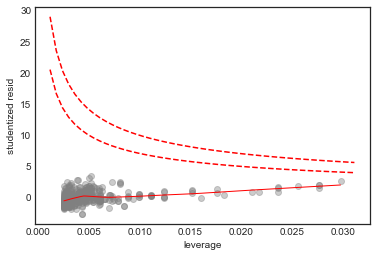

In [18]:
# scatterplot of leverage vs studentized residuals
axes = sns.regplot(model.get_influence().hat_matrix_diag, model_df.resid/model_df.resid.std(), 
            lowess=True, 
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'grey', 'edgecolors':'grey', 'alpha':0.4})
plt.xlabel('leverage')
plt.ylabel('studentized resid')

# plot Cook's distance contours for D = 0.5, D = 1
x = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 50)
plt.plot(x, np.sqrt(0.5*(1 - x)/x), color='red', linestyle='dashed')
plt.plot(x, np.sqrt((1 - x)/x), color='red', linestyle='dashed')

No point in this plot has both high leverage and high residual, and all the points in this plot are within the Cook's distance contours, so we conclude that there are no high influence points

## Footnotes


<p>
</p>

<div id="foot0"> 0. [This Medium article](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034) addresses the same issue.
<a href="#ref0">↩</a>
</div>

<p>
</p>

<div id="foot1"> 1. [This Cross-Validated question](https://stats.stackexchange.com/questions/266597/plotting-cooks-distance-lines) was helpful in figuring out how to plot the Cook's distance.
<a href="#ref1">↩</a>
</div>


